In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns

In [2]:
train = pd.read_csv("C:\\Users\\HP\\Downloads\\train.csv.zip")
test = pd.read_csv("C:\\Users\\HP\\Downloads\\test.csv.zip")

In [3]:
train.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [4]:
train.tail()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
19214,19214,749,757,143210,143219,17,4,4,2193,122,...,-0.1429,0.0044,0.2901,0,0,0,1,0,0,0
19215,19215,723,735,2488529,2488541,231,17,26,27135,104,...,0.7222,-0.0989,0.5378,0,0,0,0,0,0,1
19216,19216,6,31,1578055,1578129,780,114,98,71112,41,...,0.7719,-0.4283,0.9997,1,0,0,0,0,0,0
19217,19217,9,18,1713172,1713184,126,13,26,14808,88,...,0.9610,-0.1162,0.3509,0,0,0,0,0,0,1
19218,19218,1505,1525,1733458,1733471,182,24,33,22785,98,...,0.5263,-0.1120,0.6619,0,0,0,0,0,1,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [6]:
train.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,...,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,9609.000000,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,...,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,5548.191747,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,...,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,...,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4804.500000,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,...,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9609.000000,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,...,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14413.500000,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,...,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,19218.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train.isnull().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
Pastry                   0
Z_Scratch                0
K_Scatch                 0
Stains                   0
Dirtiness                0
Bumps                    0
Other_Faults             0
dtype: int64

In [8]:
train.nunique()

id                       19219
X_Minimum                 1191
X_Maximum                 1259
Y_Minimum                 3345
Y_Maximum                 3341
Pixels_Areas              1154
X_Perimeter                460
Y_Perimeter                331
Sum_of_Luminosity         2595
Minimum_of_Luminosity      162
Maximum_of_Luminosity       98
Length_of_Conveyer          99
TypeOfSteel_A300             2
TypeOfSteel_A400             2
Steel_Plate_Thickness       27
Edges_Index               1849
Empty_Index               1748
Square_Index              1118
Outside_X_Index            525
Edges_X_Index             1102
Edges_Y_Index              900
Outside_Global_Index         4
LogOfAreas                1072
Log_X_Index                206
Log_Y_Index                241
Orientation_Index         1598
Luminosity_Index          2046
SigmoidOfAreas             467
Pastry                       2
Z_Scratch                    2
K_Scatch                     2
Stains                       2
Dirtines

In [9]:
train.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [10]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Pastry'>

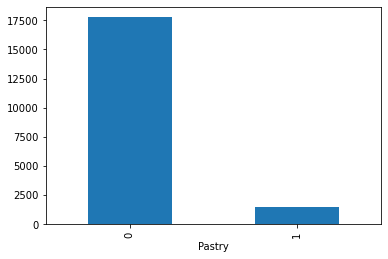

In [11]:
train['Pastry'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Z_Scratch'>

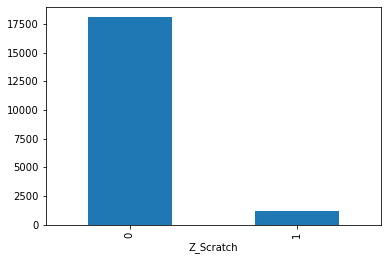

In [12]:
train['Z_Scratch'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='K_Scatch'>

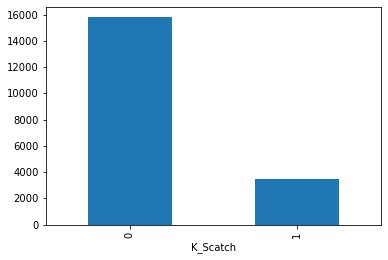

In [13]:
train['K_Scatch'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Stains'>

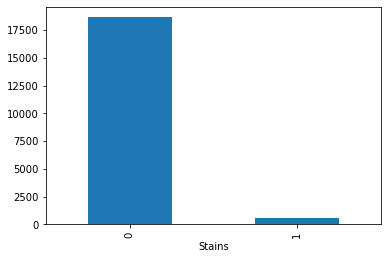

In [14]:
train['Stains'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Dirtiness'>

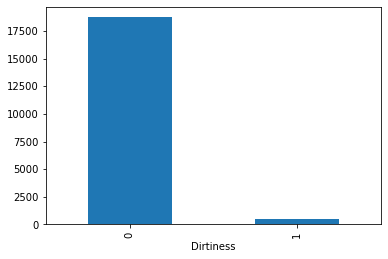

In [15]:
train['Dirtiness'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Bumps'>

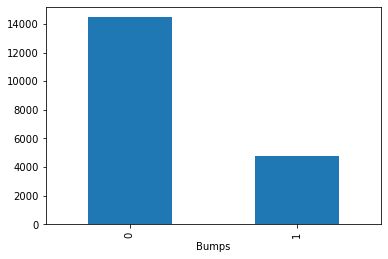

In [16]:
train['Bumps'].value_counts().plot(kind='bar')

<AxesSubplot:xlabel='Other_Faults'>

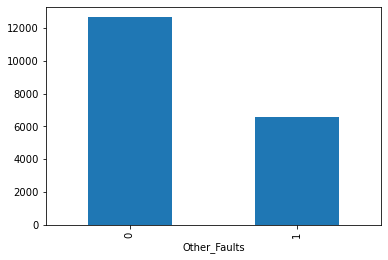

In [17]:
train['Other_Faults'].value_counts().plot(kind='bar')

In [18]:
train1 = pd.DataFrame(['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults'])
train1

,0
0,Pastry
1,Z_Scratch
2,K_Scatch
3,Stains
4,Dirtiness
5,Bumps
6,Other_Faults


In [19]:
train['summary']=train['Pastry']+train['Z_Scratch']+train['K_Scatch']+train['Stains']+train['Dirtiness']+train['Bumps']+train['Other_Faults']

In [20]:
train['summary'].value_counts()

summary
1    18380
0      818
2       21
Name: count, dtype: int64

In [21]:
test.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,19219,1015,1033,3826564,3826588,659,23,46,62357,67,...,0.0095,0.5652,1.0000,1.0,2.8410,1.1139,1.6628,0.6727,-0.2261,0.9172
1,19220,1257,1271,419960,419973,370,26,28,39293,92,...,0.0047,0.2414,1.0000,1.0,2.5682,0.9031,1.4472,0.9063,-0.1453,0.9104
2,19221,1358,1372,117715,117724,289,36,32,29386,101,...,0.0155,0.6000,0.7500,0.0,2.4609,1.3222,1.3222,-0.5238,-0.0435,0.6514
3,19222,158,168,232415,232440,80,10,11,8586,107,...,0.0037,0.8000,1.0000,1.0,1.9031,0.6990,1.0414,0.1818,-0.0738,0.2051
4,19223,559,592,544375,544389,140,19,15,15524,103,...,0.0158,0.8421,0.5333,0.0,2.1461,1.3222,1.1461,-0.5714,-0.0894,0.4170


In [22]:
test.tail()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
12809,32028,1101,1116,447943,447992,313,32,37,21603,79,...,0.0126,0.4063,0.9194,1.0,2.4955,1.2305,1.6335,0.7661,-0.3109,0.8894
12810,32029,1289,1306,3149494,3149542,59,9,18,5249,113,...,0.0052,0.7778,1.0000,1.0,1.7708,0.8451,1.2553,0.7222,-0.0448,0.1954
12811,32030,41,210,1587535,1587191,16584,796,522,1858162,24,...,0.1236,0.2199,0.4097,0.0,4.2525,2.2504,2.2672,-0.0629,-0.0801,1.0000
12812,32031,1329,1340,702237,702267,386,43,34,36875,66,...,0.0095,0.2407,1.0000,1.0,2.5866,1.1139,1.5911,0.8461,-0.2629,0.7844
12813,32032,39,187,1859616,1859633,5480,634,383,582040,38,...,0.1071,0.2439,0.3931,1.0,3.7388,2.1492,2.2014,0.1163,-0.1052,1.0000


In [23]:
test.nunique()

id                       12814
X_Minimum                 1131
X_Maximum                 1188
Y_Minimum                 2781
Y_Maximum                 2827
Pixels_Areas              1070
X_Perimeter                435
Y_Perimeter                316
Sum_of_Luminosity         2300
Minimum_of_Luminosity      161
Maximum_of_Luminosity       99
Length_of_Conveyer          92
TypeOfSteel_A300             2
TypeOfSteel_A400             2
Steel_Plate_Thickness       24
Edges_Index               1697
Empty_Index               1606
Square_Index               987
Outside_X_Index            480
Edges_X_Index              998
Edges_Y_Index              788
Outside_Global_Index         3
LogOfAreas                 994
Log_X_Index                189
Log_Y_Index                218
Orientation_Index         1382
Luminosity_Index          1887
SigmoidOfAreas             427
dtype: int64

In [24]:
test.isnull().sum()

id                       0
X_Minimum                0
X_Maximum                0
Y_Minimum                0
Y_Maximum                0
Pixels_Areas             0
X_Perimeter              0
Y_Perimeter              0
Sum_of_Luminosity        0
Minimum_of_Luminosity    0
Maximum_of_Luminosity    0
Length_of_Conveyer       0
TypeOfSteel_A300         0
TypeOfSteel_A400         0
Steel_Plate_Thickness    0
Edges_Index              0
Empty_Index              0
Square_Index             0
Outside_X_Index          0
Edges_X_Index            0
Edges_Y_Index            0
Outside_Global_Index     0
LogOfAreas               0
Log_X_Index              0
Log_Y_Index              0
Orientation_Index        0
Luminosity_Index         0
SigmoidOfAreas           0
dtype: int64

In [25]:
test.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
count,12814.000000,12814.000000,12814.000000,1.281400e+04,1.281400e+04,12814.000000,12814.000000,12814.000000,1.281400e+04,12814.000000,...,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000,12814.000000
mean,25625.500000,709.331356,753.274934,1.846533e+06,1.842029e+06,1672.908225,96.459497,64.730607,1.926893e+05,84.548072,...,0.030695,0.618650,0.833823,0.584985,2.472743,1.311689,1.388119,0.101164,-0.139516,0.572401
std,3699.227509,531.878508,500.743570,1.916427e+06,1.911426e+06,3725.518996,219.928548,188.506385,4.812871e+05,28.711574,...,0.048663,0.220361,0.220306,0.483308,0.761108,0.467621,0.401725,0.488127,0.117878,0.331974
min,19219.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,4.000000,2.000000,2.000000,5.350000e+02,0.000000,...,0.001500,0.014400,0.066700,0.000000,0.778200,0.344400,0.301000,-0.991000,-0.998900,0.119000
25%,22422.250000,46.000000,214.000000,6.401738e+05,6.398570e+05,91.000000,15.000000,14.000000,9.968000e+03,68.000000,...,0.006600,0.455075,0.666700,0.000000,1.959000,1.000000,1.079200,-0.277800,-0.192600,0.257000
50%,25625.500000,776.000000,796.000000,1.378890e+06,1.378588e+06,169.000000,24.000000,24.000000,1.840200e+04,90.000000,...,0.009500,0.638700,0.967700,1.000000,2.227900,1.146100,1.322200,0.111100,-0.143900,0.472900
75%,28828.750000,1152.000000,1167.000000,2.368032e+06,2.356238e+06,649.000000,64.000000,60.000000,6.696025e+04,105.000000,...,0.019075,0.785700,1.000000,1.000000,2.814125,1.431400,1.707600,0.529400,-0.084300,0.999200
max,32032.000000,1688.000000,1712.000000,1.298766e+07,1.298769e+07,152655.000000,10449.000000,18152.000000,1.159141e+07,203.000000,...,0.747200,1.000000,1.000000,1.000000,4.680200,2.938500,4.258700,0.973900,0.591700,1.000000


In [26]:
test.corr()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
id,1.000000,0.005860,0.005865,0.009184,0.005734,0.005707,0.002032,0.009040,0.012553,-0.003546,...,0.002630,-0.009969,0.004401,0.008510,0.003659,-0.000850,0.010689,0.012755,0.013256,0.004094
X_Minimum,0.005860,1.000000,0.989910,0.021840,0.018948,-0.455543,-0.365908,-0.231166,-0.383533,0.342075,...,-0.504283,0.100500,0.461750,0.222011,-0.499350,-0.525081,-0.376977,0.279312,-0.054364,-0.376113
X_Maximum,0.005865,0.989910,1.000000,0.022623,0.020350,-0.382299,-0.305374,-0.192019,-0.321602,0.279057,...,-0.414266,0.084217,0.391220,0.188479,-0.423116,-0.441791,-0.318267,0.237350,-0.065087,-0.318786
Y_Minimum,0.009184,0.021840,0.022623,1.000000,0.973666,-0.010165,-0.011793,-0.005392,-0.006563,-0.013294,...,0.009703,0.064984,0.012540,-0.022642,-0.004464,0.006730,-0.023842,-0.044225,-0.021022,-0.034291
Y_Maximum,0.005734,0.018948,0.020350,0.973666,1.000000,-0.010334,-0.012091,-0.005788,-0.015492,-0.013668,...,0.009724,0.066330,0.010543,-0.023447,-0.004307,0.008505,-0.024039,-0.045094,-0.019910,-0.032853
Pixels_Areas,0.005707,-0.455543,-0.382299,-0.010165,-0.010334,1.000000,0.830738,0.744075,0.813846,-0.623879,...,0.755300,-0.299166,-0.650268,-0.219829,0.773510,0.744855,0.639429,-0.281857,-0.017746,0.539704
X_Perimeter,0.002032,-0.365908,-0.305374,-0.011793,-0.012091,0.830738,1.000000,0.750379,0.703639,-0.502627,...,0.622144,-0.314374,-0.535773,-0.152570,0.631094,0.618532,0.553674,-0.196293,0.003838,0.459540
Y_Perimeter,0.009040,-0.231166,-0.192019,-0.005392,-0.005788,0.744075,0.750379,1.000000,0.579876,-0.338032,...,0.389356,-0.267466,-0.322377,-0.046270,0.434230,0.390407,0.420040,-0.055724,-0.008022,0.329564
Sum_of_Luminosity,0.012553,-0.383533,-0.321602,-0.006563,-0.015492,0.813846,0.703639,0.579876,1.000000,-0.537871,...,0.642542,-0.299059,-0.558888,-0.167522,0.674036,0.641799,0.576094,-0.218072,-0.004853,0.479013
Minimum_of_Luminosity,-0.003546,0.342075,0.279057,-0.013294,-0.013668,-0.623879,-0.502627,-0.338032,-0.537871,1.000000,...,-0.623784,0.238200,0.466668,0.118696,-0.701140,-0.643070,-0.597656,0.190263,0.620336,-0.513330


In [27]:
test.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas'],
      dtype='object')

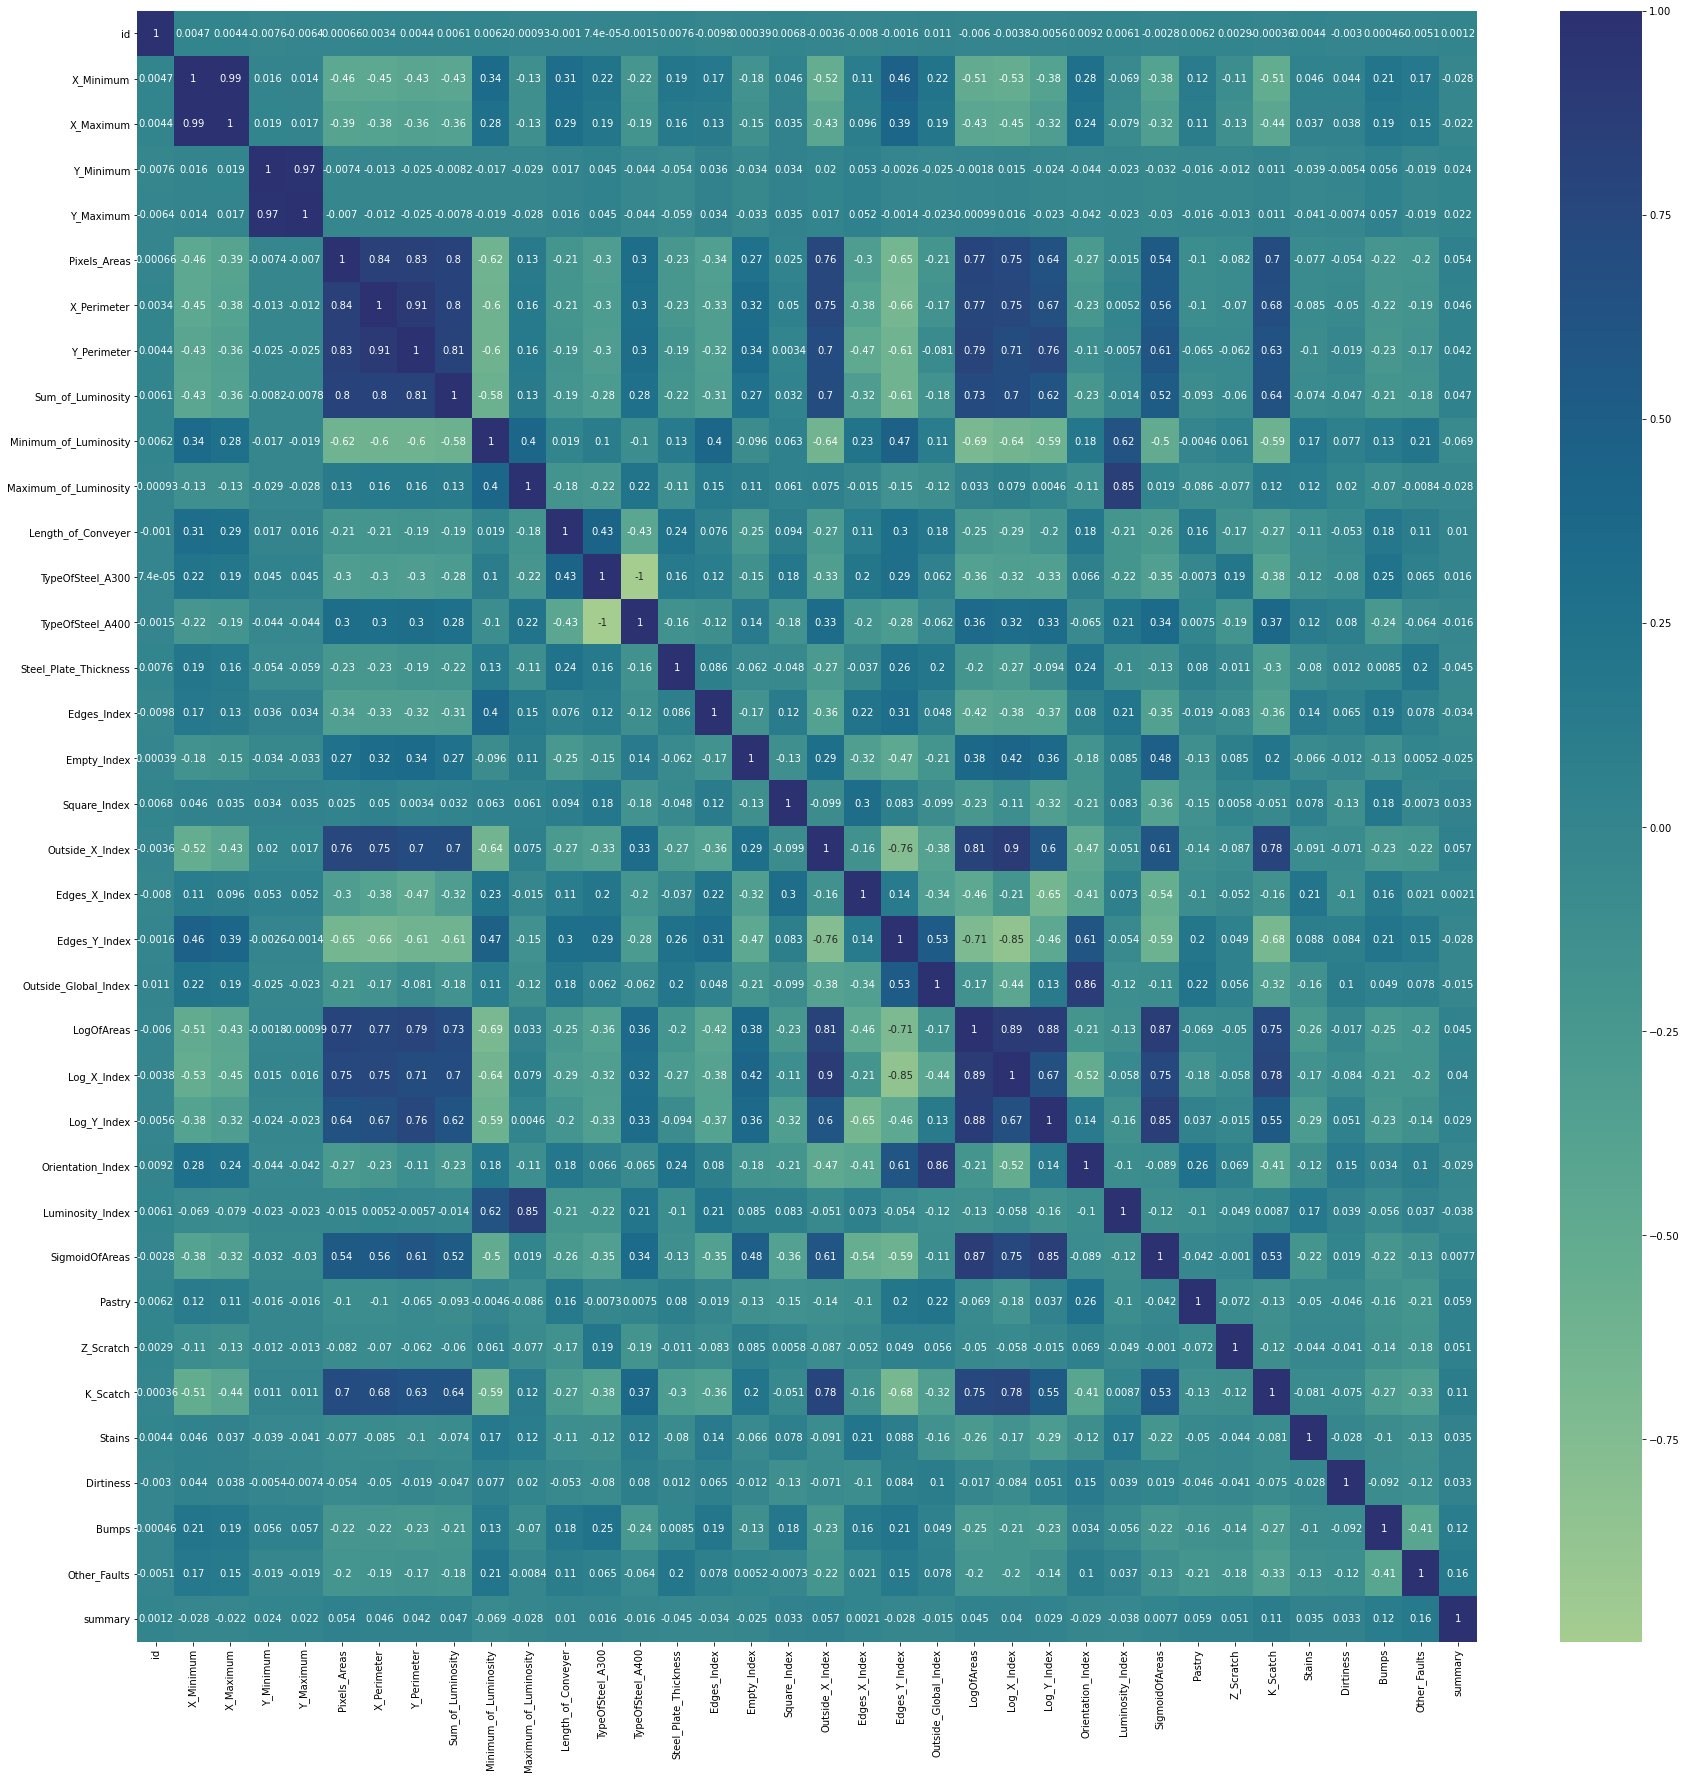

In [28]:
corr = train.corr()
# plot the heatmap
plt.figure(figsize=(30,30))
s=sns.heatmap(corr,annot=True, cmap='crest')

In [29]:
X=train.drop(columns=['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'])
y=train[['Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults' ]]

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y ,train_size=0.75, random_state=42)

In [31]:
X_train.shape

(14414, 29)

In [32]:
X_test.shape

(4805, 29)

In [33]:
y_train.shape

(14414, 7)

In [34]:
y_test.shape

(4805, 7)

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [36]:
predictions = rf_classifier.predict(X_test)
predictions 


array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int64)

In [37]:
!pip install CatBoost

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 24.1 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063



  Using cached catboost-1.2.3-cp38-cp38-win_amd64.whl.metadata (1.2 kB)
  Using cached graphviz-0.20.1-py3-none-any.whl.metadata (12 kB)
Using cached catboost-1.2.3-cp38-cp38-win_amd64.whl (101.1 MB)
   ---------------------------------------- 47.0/47.0 kB 337.6 kB/s eta 0:00:00


In [38]:

from sklearn.metrics import roc_auc_score
from sklearn.multioutput import MultiOutputClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from catboost import CatBoostClassifier

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification

In [43]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Training the classifier
gnb.fit(X_train, y_train)

GaussianNB()

In [46]:
predictions = gnb.predict(X_test)
predictions

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)*100
print("Accuracy:", accuracy)

Accuracy: 79.5


In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [69]:
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a k-NN classifier with k=5 (you can adjust the value of k)
knn = KNeighborsClassifier(n_neighbors=5)

# Training the classifier
knn.fit(X_train, y_train)

# Making predictions on the testing set
predictions = knn.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)*100
print("Accuracy:", accuracy)

Accuracy: 81.0


In [70]:
predictions

array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1])

In [64]:
main = pd.read_csv("C:\\Users\\HP\\Downloads\\sample_submission.csv")

In [65]:
main

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.5,0.5,0.5,0.5,0.5,0.5,0.5
1,19220,0.5,0.5,0.5,0.5,0.5,0.5,0.5
2,19221,0.5,0.5,0.5,0.5,0.5,0.5,0.5
3,19222,0.5,0.5,0.5,0.5,0.5,0.5,0.5
4,19223,0.5,0.5,0.5,0.5,0.5,0.5,0.5
...,...,...,...,...,...,...,...,...
12809,32028,0.5,0.5,0.5,0.5,0.5,0.5,0.5
12810,32029,0.5,0.5,0.5,0.5,0.5,0.5,0.5
12811,32030,0.5,0.5,0.5,0.5,0.5,0.5,0.5
12812,32031,0.5,0.5,0.5,0.5,0.5,0.5,0.5
